In [1]:
setwd("/home/victor/OneDrive/Online Courses/MITx 15.071x The Analytics Edge")

In [3]:
tweets = read.csv("Unit5_1/Unit5_1/tweets.csv", stringsAsFactors = FALSE)
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [4]:
tweets$Negative = as.factor(tweets$Avg <= -1)

In [5]:
table(tweets$Negative)


FALSE  TRUE 
  999   182 

In [6]:
install.packages("tm")
install.packages("SnowballC")

also installing the dependencies ‘NLP’, ‘slam’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [18]:
corpus = Corpus(VectorSource(tweets$Tweet))
corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1181

In [21]:
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

In [22]:
corpus = tm_map(corpus, tolower)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”

In [23]:
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

In [24]:
corpus = tm_map(corpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”

In [25]:
corpus[[1]]$content

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"

In [26]:
stopwords("english")[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [29]:
corpus = tm_map(corpus, removeWords, c("apple",stopwords("english")))

Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("apple", stopwords("english"))):
“transformation drops documents”

In [30]:
corpus[[1]]$content

[1] "   say    far  best customer care service   ever received  appstore"

In [31]:
corpus = tm_map(corpus, stemDocument)

Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
“transformation drops documents”

In [32]:
corpus[[1]]$content

[1] "say far best custom care servic ever receiv appstor"

In [33]:
frequencies = DocumentTermMatrix(corpus)
frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [34]:
inspect(frequencies[1000:1005,505:515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   asap courtsideassistappforio current follow idea kickbutt preinstal save
  1000    0                       0       0      0    1        0         0    0
  1001    0                       0       0      0    0        0         0    0
  1002    0                       0       0      0    0        0         0    0
  1003    0                       0       0      0    0        0         0    0
  1004    0                       0       0      0    0        0         0    0
  1005    0                       0       0      0    0        0         0    0
      Terms
Docs   ssd support
  1000   0       0
  1001   0       0
  1002   0       0
  1003   0       0
  1004   0       0
  1005   0       0


In [35]:
findFreqTerms(frequencies, lowfreq = 20)

[1] "say"                  "love"                 "iphon"               
 [4] "iphone5"              "new"                  "thank"               
 [7] "phone"                "can"                  "make"                
[10] "market"               "one"                  "will"                
[13] "cant"                 "get"                  "just"                
[16] "updat"                "fingerprint"          "iphone5c"            
[19] "store"                "time"                 "come"                
[22] "now"                  "use"                  "back"                
[25] "anyon"                "work"                 "app"                 
[28] "android"              "think"                "ipad"                
[31] "well"                 "freak"                "dont"                
[34] "via"                  "better"               "like"                
[37] "pleas"                "samsung"              "want"                
[40] "batteri"              "ios7"                 "microsoft"           
[43] "itun"                 "buy"                  "releas"              
[46] "look"                 "appl"                 "need"                
[49] "googl"                "twitter"              "ipod"                
[52] "ipodplayerpromo"      "promoipodplayerpromo" "lol"                 
[55] "realli"               "promo"

In [41]:
findFreqTerms(frequencies, lowfreq = 100)

[1] "iphon" "new"   "itun"

In [36]:
sparse = removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [37]:
tweetsSparse = as.data.frame(as.matrix(sparse))
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))
tweetsSparse$Negative = tweets$Negative

In [38]:
library(caTools)

In [40]:
set.seed(123)
split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)
trainSparse = subset(tweetsSparse, split == TRUE)
testSparse = subset(tweetsSparse, split == FALSE)

In [42]:
library(rpart)
library(rpart.plot)

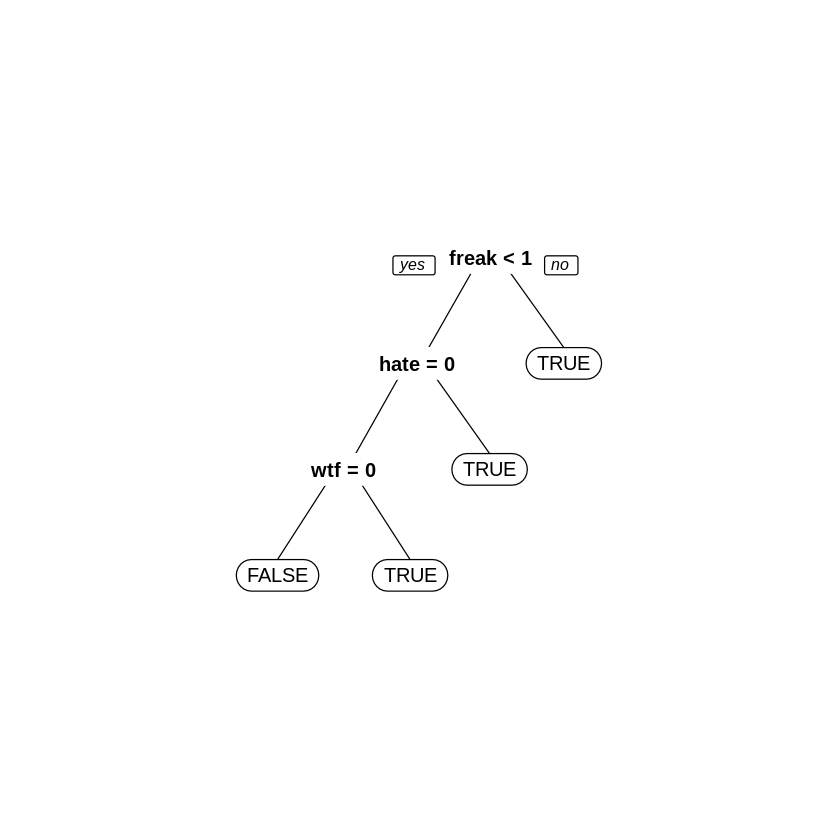

In [43]:
tweetCART = rpart(Negative ~. , data = trainSparse, method = "class")
prp(tweetCART)

In [44]:
predictCART = predict(tweetCART, newdata = testSparse, type = "class")
table(testSparse$Negative, predictCART)

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [45]:
acc = (294 + 18)/nrow(testSparse)
acc

[1] 0.8788732

In [46]:
table(testSparse$Negative)


FALSE  TRUE 
  300    55 

In [47]:
acc2 = 300/nrow(testSparse)
acc2

[1] 0.8450704

In [48]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [49]:
set.seed(123)
tweetRF = randomForest(Negative ~ ., data = trainSparse)

In [50]:
predictRF = predict(tweetRF , newdata = testSparse)
table(testSparse$Negative, predictRF)

       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     33   22

In [51]:
accRF = (293 + 22)/nrow(testSparse)
accRF

[1] 0.8873239

In [52]:
tweetLog = glm(Negative ~  ., data = trainSparse, family = "binomial")
summary(tweetLog)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Negative ~ ., family = "binomial", data = trainSparse)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (7 not defined because of singularities)
                       Estimate Std. Error    z value Pr(>|z|)    
(Intercept)          -2.817e+15  5.330e+06 -528524146   <2e-16 ***
appstor              -1.831e+15  3.697e+07  -49515454   <2e-16 ***
best                  1.584e+15  3.759e+07   42124142   <2e-16 ***
care                  3.422e+15  3.773e+07   90696602   <2e-16 ***
custom               -1.495e+15  4.341e+07  -34436588   <2e-16 ***
ever                  1.592e+15  4.475e+07   35585839   <2e-16 ***
say                  -6.510e+14  2.609e+07  -24947529   <2e-16 ***
servic               -1.325e+15  3.904e+07  -33933850   <2e-16 ***
love                 -1.965e+15  2.229e+07  -88169622   <2e-16 ***
iphon                 3.805e+14  7.159e+06   53157507   <2e-16 ***
iphone5              -6.074

In [53]:
predictions = predict(tweetLog, newdata=testSparse, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [55]:
table(testSparse$Negative,predictions >= 0.5)

       
        FALSE TRUE
  FALSE   260   40
  TRUE     30   25

In [56]:
accLog = (260 +  25)/nrow(testSparse)
accLog

[1] 0.8028169